<a href="https://colab.research.google.com/github/sainikhit2k/Naruto-Hand-Sign-Prediction/blob/master/NarutoHandSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d vikranthkanumuru/naruto-hand-sign-dataset


100% 2.02G/2.02G [01:01<00:00, 35.9MB/s]
100% 2.02G/2.02G [01:01<00:00, 35.4MB/s]


In [ ]:
!unzip naruto-hand-sign-dataset.zip

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2

train_dir = '/content/Pure Naruto Hand Sign Data/train/'
test_dir =  '/content/Pure Naruto Hand Sign Data/test/'

labels_dict = {'bird': 0,
               'boar': 1,
               'dog': 2,
               'dragon': 3,
               'hare': 4,
               'horse': 5, 
               'monkey': 6, 
               'ox': 7,
               'ram': 8,
               'rat': 9,
               'snake': 10,
               'tiger': 11,
               'zero': 12
               }
images = []
labels = []

for curr in [train_dir, test_dir]:
  classes = os.listdir(curr)
  print(curr)
  tot = 0
  for cls in classes:
    print(cls, len(os.listdir(curr + cls + '/')))
    for img_name in os.listdir(curr + cls + '/'):
      try:
        img = cv2.imread(train_dir + cls + '/' + img_name)
        img = cv2.resize(img, (224, 224), cv2.INTER_AREA)
        images.append(img)
        labels.append(labels_dict[cls])
      except:
        print(cls, img_name)




/content/Pure Naruto Hand Sign Data/train/
dragon 146
rat 125
monkey 136
tiger 167
hare 174
ram 117
horse 157
zero 199
ox 169
bird 188
snake 146
boar 172
dog 263
/content/Pure Naruto Hand Sign Data/test/
dragon 10
dragon dragon_IMG_472136fb6-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_4415275ac-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_160a030a2-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_2361fba0a-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_02a926156-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_13065afc0-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_33b7cf0bc-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_05aa189a8-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_36c337884-4d5c-11ea-b58b-0242ac1c0002.jpg
dragon dragon_IMG_266911486-4d5c-11ea-b58b-0242ac1c0002.jpg
rat 5
rat rat_IMG_2b3690ada-4d92-11ea-bd92-0242ac1c0002.jpg
rat rat_IMG_4c3af9e5e-4d92-11ea-bd92-0242ac1c0002.jpg
rat rat_IMG_1ac6bc77c-4d92-11ea-bd92-0242ac1c0002.jpg
rat rat_IMG_3bb5a6

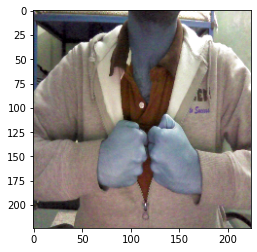

In [3]:
import numpy as np

images = np.asarray(images, dtype=np.float32)
labels = np.asarray(labels, dtype=np.int8)
s = np.arange(images.shape[0])
np.random.shuffle(s)

images = images[s]
labels = labels[s]


plt.imshow(images[1867].astype('uint8'))

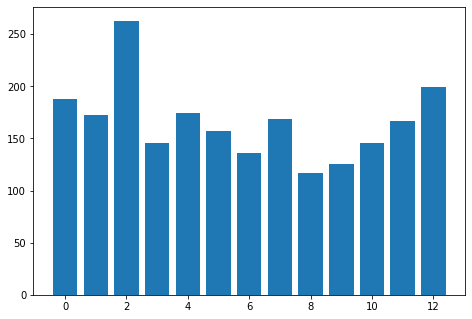

In [4]:
classes,freq = np.unique(labels, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(classes, freq)
plt.show()
# print(classes, freq, sep='\n')

In [5]:
import keras
from keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from keras.models import Model, Sequential
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

images = images/255
labels = to_categorical(labels)


Using TensorFlow backend.


In [7]:
batch_size = 32
epochs = 30
target_size = (224, 224, 3)

In [8]:
train_imgs, test_imgs, train_y, test_y = train_test_split(images, labels, test_size=0.2, shuffle=True)

print(train_imgs.shape, test_imgs.shape)
print(train_y.shape, test_y.shape)


(1727, 224, 224, 3) (432, 224, 224, 3)
(1727, 13) (432, 13)


In [13]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs["val_accuracy"] > 0.98:
      print(f'Reached {logs["accuracy"] * 100}%  validation accuracy. Stopped training')
      self.model.stop_training = True

callback = myCallback()

In [14]:
model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), input_shape=target_size, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(13, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 112, 112, 256)     7168      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 55, 55, 256)       590080    
_________________________________________________________________
dropout_3 (Dropout)          (None, 55, 55, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 128)       295040    
_________________________________________________________________
dropout_4 (Dropout)          (None, 27, 27, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)             

In [15]:
history = model.fit(train_imgs, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[callback])

Train on 1381 samples, validate on 346 samples
Epoch 1/30
1381/1381 [==============================] - 20s 15ms/step - loss: 2.4206 - accuracy: 0.3678 - val_loss: 1.1270 - val_accuracy: 0.7081
Epoch 2/30
1381/1381 [==============================] - 20s 15ms/step - loss: 0.6856 - accuracy: 0.8016 - val_loss: 0.3955 - val_accuracy: 0.8815
Epoch 3/30
1381/1381 [==============================] - 20s 15ms/step - loss: 0.3278 - accuracy: 0.9030 - val_loss: 0.2841 - val_accuracy: 0.9017
Epoch 4/30
1381/1381 [==============================] - 20s 15ms/step - loss: 0.1900 - accuracy: 0.9406 - val_loss: 0.3213 - val_accuracy: 0.9277
Epoch 5/30
1381/1381 [==============================] - 20s 15ms/step - loss: 0.0978 - accuracy: 0.9718 - val_loss: 0.1542 - val_accuracy: 0.9595
Epoch 6/30
1381/1381 [==============================] - 20s 15ms/step - loss: 0.0601 - accuracy: 0.9797 - val_loss: 0.1455 - val_accuracy: 0.9538
Epoch 7/30
1381/1381 [==============================] - 20s 15ms/step - loss:

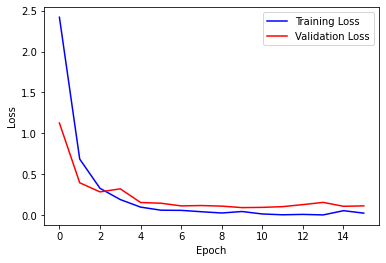

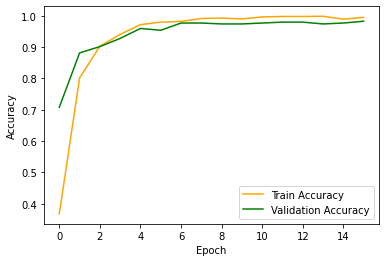

In [23]:
plot1 = plt.figure(1)
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plot2 = plt.figure(2)
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [30]:
y_pred = model.predict(test_imgs)
y_pred = np.argmax(y_pred, axis=1)
test_y = np.argmax(test_y, axis=1)

print(y_pred.shape)
print(test_y.shape)


(432,)
(432,)


In [33]:
correct = np.sum(y_pred == test_y)
acc = (correct/test_y.shape[0]) * 100
print(f'Accuracy: {acc:.2f}')

Accuracy: 94.91


In [36]:
model.save('/content/drive/My Drive/DCGAN/best_model.h5')

In [39]:
from google.colab import files
files.upload()

Saving naruto-hand-seal-horse.jpg to naruto-hand-seal-horse.jpg


{'naruto-hand-seal-horse.jpg': b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x01r\x02\xe4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x05\x04\x06\x07\x03\x08\xff\xc4\x00D\x10\x00\x02\x01\x03\x02\x04\x04\x03\x06\x03\x05\x07\x03\x05\x01\x00\x00\x01\x02\x03\x04\x11\x05!\x06\x121A\x07\x13Qa"2q\x14\x15#B\x81\x913Rb\x08$r\x82\x92\x1645CS\xa1\xb1%c\xd1&DTU\x93\xe1\xff\xc4\x00\x1a\x01\x01\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00&\x11\x01\x01\x00\x02\x01\x04\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x01\x02\x03\x11\x04\x12!1\x13A\x052Q\x14"a\x15q\xff\xda

{'bird': 0, 'boar': 1, 'dog': 2, 'dragon': 3, 'hare': 4, 'horse': 5, 'monkey': 6, 'ox': 7, 'ram': 8, 'rat': 9, 'snake': 10, 'tiger': 11, 'zero': 12}
[5]


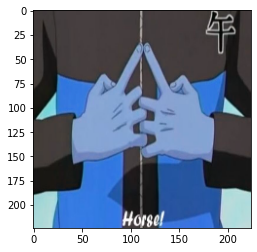

In [48]:
def infer(img_name):
  img = cv2.imread(img_name)
  img = cv2.resize(img, (224, 224), cv2.INTER_AREA)
  img = np.expand_dims(img, axis=0) 
  pred = model.predict(img)
  pred = np.argmax(pred, axis=1)
  plt.imshow(img[0].astype('uint8'))
  print(labels_dict)
  print(pred)

infer('/content/naruto-hand-seal-horse.jpg')